In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [7]:
# Data Process
try_version = False
if try_version:
    results = pd.read_csv("shortest_path_try.csv")
else:
    results = pd.read_csv("shortest_path.csv")
results = results.loc[(results["grid_dim"] == 5) & (results["p_features"] == 5)]
results_summary = results.describe()
results = results.assign(
    SPOplus_norm_spo=results["SPOplus_spoloss_test"] / results["zstar_avg_test"],
    LS_norm_spo=results["LS_spoloss_test"] / results["zstar_avg_test"],
    RF_norm_spo=results["RF_spoloss_test"] / results["zstar_avg_test"],
    Absolute_norm_spo=results["Absolute_spoloss_test"] / results["zstar_avg_test"]
)
results = results.rename(columns={
    "SPOplus_norm_spo": "SPO+",
    "LS_norm_spo": "Least Squares",
    "RF_norm_spo": "Random Forests",
    "Absolute_norm_spo": "Absolute Loss"
})
results_relevant = results.filter(["grid_dim", "p_features", "n_train", "polykernel_degree", 
                                   "polykernel_noise_half_width", "SPO+", "Least Squares", "Random Forests", "Absolute Loss"])
results_relevant_fixed = results_relevant.melt(id_vars=["grid_dim", "p_features", "n_train", 
                                                        "polykernel_degree", "polykernel_noise_half_width"], var_name="method", value_name="spo_normalized")
results_relevant_fixed["method"] = pd.Categorical(results_relevant_fixed["method"])
results_relevant_fixed["n_train"] = pd.Categorical(results_relevant_fixed["n_train"])
results_relevant_fixed["polykernel_noise_half_width"] = pd.Categorical(results_relevant_fixed["polykernel_noise_half_width"])
results_relevant_fixed["grid_dim"] = pd.Categorical(results_relevant_fixed["grid_dim"])
training_set_size_names = [
    "Training Set Size = 100",
    "Training Set Size = 1000",
    "Training Set Size = 5000"
]
half_width_names = ["Noise Half-width = 0", "Noise Half-width = 0.5"]
training_set_size_names = {
    100: "Training Set Size = 100",
    1000: "Training Set Size = 1000",
    5000: "Training Set Size = 5000"
}
half_width_names = {
    0: "Noise Half-width = 0",
    0.5: "Noise Half-width = 0.5"
}
training_set_size_labeller = lambda x: training_set_size_names[x]
half_width_labeller = lambda x: half_width_names[x]


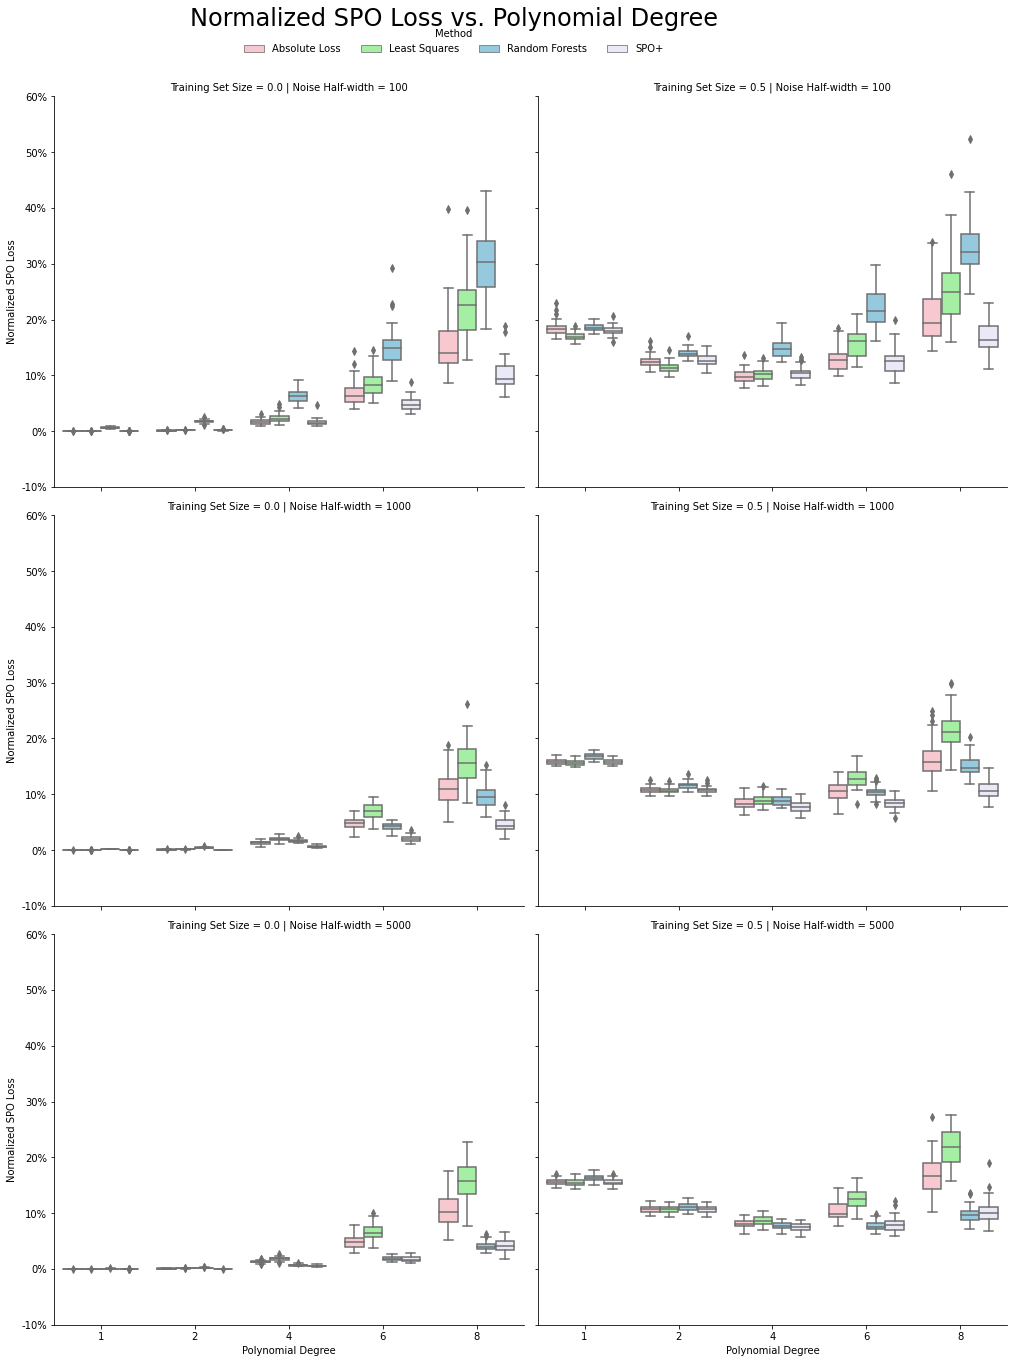

In [8]:
# Add facet wrap
g = sns.FacetGrid(data=results_relevant_fixed, row='n_train', col='polykernel_noise_half_width', height=6, aspect=1.2)
g.map_dataframe(sns.boxplot, x='polykernel_degree', y='spo_normalized', hue='method', palette=["pink", "palegreen", "skyblue", "lavender"])
g.set_yticklabels(['{:,.0%}'.format(x) for x in plt.gca().get_yticks()])
g.set_xlabels("Polynomial Degree")
g.set_ylabels("Normalized SPO Loss")
g.set_titles(col_template="Noise Half-width = {row_name}", row_template="Training Set Size = {col_name}")
g.set_axis_labels(x_var="Polynomial Degree", y_var="Normalized SPO Loss")
g.add_legend(title="Method", bbox_to_anchor=(0.32, 1.04), loc='upper center', ncol=4, mode='fill')
g.fig.suptitle('Normalized SPO Loss vs. Polynomial Degree', fontsize=24, y=1.05, x=0.32)
# Save plot
g.savefig("shotest_path_plot.png")